<a href="https://colab.research.google.com/github/PavankumarUppar/DLL/blob/main/Program2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch [10/100], Loss: 0.5559
Epoch [20/100], Loss: 0.4450
Epoch [30/100], Loss: 0.3667
Epoch [40/100], Loss: 0.3169
Epoch [50/100], Loss: 0.2884
Epoch [60/100], Loss: 0.2729
Epoch [70/100], Loss: 0.2640
Epoch [80/100], Loss: 0.2582
Epoch [90/100], Loss: 0.2533
Epoch [100/100], Loss: 0.2486
Test Accuracy: 0.8900


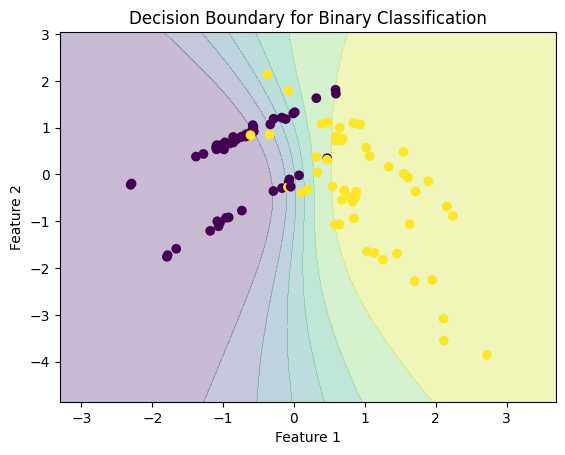

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Create synthetic two-class classification dataset
X, y = make_classification(n_samples=500, n_features=2, n_classes=2, n_redundant=0, n_informative=2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert numpy arrays to PyTorch tensors
X_train_tensor = torch.Tensor(X_train)
y_train_tensor = torch.Tensor(y_train).view(-1, 1)  # Reshape to column vector

X_test_tensor = torch.Tensor(X_test)
y_test_tensor = torch.Tensor(y_test).view(-1, 1)  # Reshape to column vector

# Define the neural network architecture
class DeepNeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(DeepNeuralNetwork, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size1)
        self.activation1 = nn.Tanh()  # or nn.ReLU() for ReLU activation
        self.layer2 = nn.Linear(hidden_size1, hidden_size2)
        self.activation2 = nn.Tanh()  # or nn.ReLU() for ReLU activation
        self.output_layer = nn.Linear(hidden_size2, output_size)
        self.output_activation = nn.Sigmoid()  # or nn.Softmax(dim=1) for multiclass

    def forward(self, x):
        x = self.layer1(x)
        x = self.activation1(x)
        x = self.layer2(x)
        x = self.activation2(x)
        x = self.output_layer(x)
        x = self.output_activation(x)
        return x

# Instantiate the model, define loss function and optimizer
input_size = X_train.shape[1]
hidden_size1 = 64
hidden_size2 = 32
output_size = 1  # Binary classification

model = DeepNeuralNetwork(input_size, hidden_size1, hidden_size2, output_size)
criterion = nn.BCELoss()  # Binary Cross Entropy Loss for binary classification
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the neural network
epochs = 100

for epoch in range(epochs):
    # Forward pass
    y_pred = model(X_train_tensor)

    # Compute the loss
    loss = criterion(y_pred, y_train_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Evaluate the model on the test set
with torch.no_grad():
    model.eval()
    y_pred_test = model(X_test_tensor)
    y_pred_test_binary = (y_pred_test > 0.5).float()

# Calculate accuracy on the test set
accuracy = (y_pred_test_binary == y_test_tensor).float().mean().item()
print(f'Test Accuracy: {accuracy:.4f}')

# Function to plot decision boundary
def plot_decision_boundary(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

    Z = model(torch.Tensor(np.c_[xx.ravel(), yy.ravel()])).detach().numpy()
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Plot the decision boundary for the trained model
plot_decision_boundary(X_test, y_test, model, 'Decision Boundary for Binary Classification')
